In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('match_report_data.csv')
#df

In [3]:
grouped = df.groupby("Game Result").sum()
grouped.reset_index(inplace = True)
grouped

,Game Result,Game Number,GO_Hit,GO_Miss,S_Hit,S_Miss,W_Hit,W_Miss
0,Loss,61,17.0,11.0,7.0,11.0,4.5,8.5
1,Tie,48,13.0,7.0,6.0,9.0,9.5,4.5
2,Win,39,7.5,1.5,4.0,5.0,9.0,2.0


In [4]:
final_list = []

In [5]:
for i in range(len(grouped)):
    game_result = grouped.loc[i, 'Game Result']
    go_hit = grouped.loc[i, 'GO_Hit']
    go_miss = grouped.loc[i, 'GO_Miss']
    go_rate = round((go_hit / (go_hit + go_miss)) * 100, 0)
    s_hit = grouped.loc[i, 'S_Hit']
    s_miss = grouped.loc[i, 'S_Miss']
    s_rate = round((s_hit / (s_hit + s_miss)) * 100, 0)
    w_hit = grouped.loc[i, 'W_Hit']
    w_miss = grouped.loc[i, 'W_Miss']
    w_rate = round((w_hit / (w_hit + w_miss)) * 100, 0)
    final_list.append([game_result, 'General Observation Continuation Rate', go_rate])
    final_list.append([game_result, 'Strength Nullification Rate', s_rate])
    final_list.append([game_result, 'Weakness Exploitation Rate', w_rate])

In [6]:
final_list

[['Loss', 'General Observation Continuation Rate', 61.0],
 ['Loss', 'Strength Nullification Rate', 39.0],
 ['Loss', 'Weakness Exploitation Rate', 35.0],
 ['Tie', 'General Observation Continuation Rate', 65.0],
 ['Tie', 'Strength Nullification Rate', 40.0],
 ['Tie', 'Weakness Exploitation Rate', 68.0],
 ['Win', 'General Observation Continuation Rate', 83.0],
 ['Win', 'Strength Nullification Rate', 44.0],
 ['Win', 'Weakness Exploitation Rate', 82.0]]

In [7]:
final_df = pd.DataFrame(final_list, columns = ['Game Result', 'Rate Type', 'Rate'])
final_df

,Game Result,Rate Type,Rate
0,Loss,General Observation Continuation Rate,61.0
1,Loss,Strength Nullification Rate,39.0
2,Loss,Weakness Exploitation Rate,35.0
3,Tie,General Observation Continuation Rate,65.0
4,Tie,Strength Nullification Rate,40.0
5,Tie,Weakness Exploitation Rate,68.0
6,Win,General Observation Continuation Rate,83.0
7,Win,Strength Nullification Rate,44.0
8,Win,Weakness Exploitation Rate,82.0


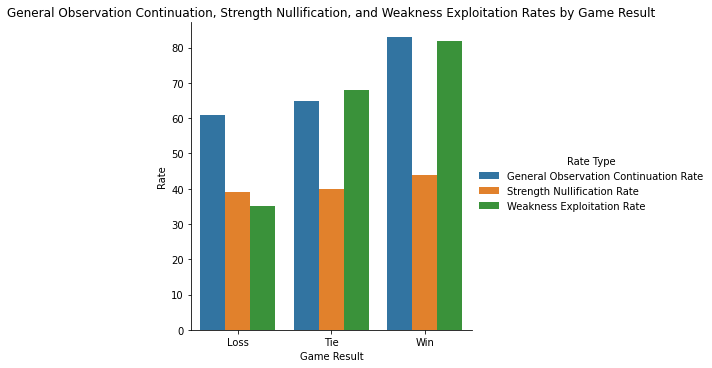

In [8]:
sns.catplot(data=final_df, kind="bar",
    x="Game Result", y="Rate", hue="Rate Type").set(
    title = 'General Observation Continuation, Strength Nullification, and Weakness Exploitation Rates by Game Result')